# 120 years of Olympic Data Analysis
### Predicting an Athlete's Performance Score


---

>> A regression model to predict an athlete's performance score in a specific Olympic event using features such as their sport, event, previous scores, and performance metrics.

---

Python - **Team Jupyter**

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data / Data Preparation</a>

<a href=#three>4. Exploratory Data Analysis(EDA)</a>

<a href=#four>5. Feature Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

<a id="two"></a>
# 2. Loading the Data/ Data Preparation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [2]:
# Load the first dataset
df1 = pd.read_csv("athlete_events.csv")
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df1.shape

(271116, 15)

In [4]:
# Load the second dataset
df2 = pd.read_csv("noc_regions.csv")
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df2.shape

(230, 3)

<a id="three"></a>
# 3. Exploratory Data Analysis(EDA)
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---



>> To maximize the analysis, I will merge the two datasets, **df1** and **df2**, based on the common column **'NOC'**. By doing so, we can combine the information from both datasets that corresponds to the same 'NOC' values. This will allow us to leverage the shared information and perform comprehensive analysis using the merged dataset.


---

In [6]:
merged_df = pd.merge(df1, df2, on='NOC')
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [7]:
# All columns present in the merged dataset
merged_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [8]:
# Size of merged dataset
merged_df.shape

(270767, 17)

In [9]:
merged_df.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
# Checking for empty cells
merged_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

 > ### 1. Approach to  handle missing data <br>
    >- Drop columns with a large number of missing values, such as **'notes'**.<br>
    >- For columns like **'Age'**, **'Height'**, **'Weight'**, and **'region'**, will be filled with appropriate methods like<br> mean, median, or mode based on the column's distribution and context.
    >- The **'Medal'** column will be considered that athletes without a medal may have a performance <br>score of zero.

In [12]:
merged_df.drop('notes', axis=1, inplace=True)

In [13]:
merged_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

>> After executing the above code, the **'notes'** column has been successfully removed from the DataFrame. <br>This decision was made due to the high number of missing values in the column.<br> By eliminating this column, we prevent any potential misleading analysis that could result from attempting to work with incomplete or unreliable data.

In [14]:
# Fill missing values in 'Age' column with the mean
merged_df['Age'].fillna(merged_df['Age'].mean(), inplace=True)

# Fill missing values in 'Height' column with the median
merged_df['Height'].fillna(merged_df['Height'].median(), inplace=True)

# Fill missing values in 'Weight' column with the median
merged_df['Weight'].fillna(merged_df['Weight'].median(), inplace=True)

# Fill missing values in 'region' column with the mode
merged_df['region'].fillna(merged_df['region'].mode()[0], inplace=True)


>> Using the **mean** helps preserve the overall average Age of the dataset.<br> The median is a robust measure of central tendency that is less sensitive to outliers compared to the mean.<br> By using the median, we ensure that the filled values align with the typical or representative weight observed in the dataset.<br> By filling missing values in 'region' with the mode, we assign the most common region to the missing values.

In [15]:
merged_df['Medal'].fillna(value='No Medal', inplace=True)

In [41]:
merged_df["Medal"].unique()

array(['No Medal', 'Silver', 'Bronze', 'Gold'], dtype=object)

>> This code replaces the missing values in the **'Medal'** column with the string **'No Medal'**. <br> It assumes that athletes without a medal have a performance score of **zero**.

In [16]:
merged_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

Perfect, the data is clean.


---

In [21]:
categ_col = merged_df.select_dtypes(include=["object", "category"]).columns
print(categ_col)

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal', 'region'],
      dtype='object')


---

>### 2. Encoding -  Convert categorical variables to numerical representations <br>
    >- Encode categorical features like **'sport'**, **'Event'**, **'Team'**, **'NOC'**, **'Season'** and **'City'** into numerical representations using techniques like **one-hot encoding** or **label encoding**.
    
    
---


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
merged_df['Sport_encoded'] = label_encoder.fit_transform(merged_df['Sport'])
merged_df['Event_encoded'] = label_encoder.fit_transform(merged_df['Event'])
merged_df['Team_encoded'] = label_encoder.fit_transform(merged_df['Team'])
merged_df['NOC_encoded'] = label_encoder.fit_transform(merged_df['NOC'])
merged_df['Season_encoded'] = label_encoder.fit_transform(merged_df['Season'])
merged_df['City_encoded'] = label_encoder.fit_transform(merged_df['City'])

print(merged_df)


            ID                Name Sex   Age  Height  Weight     Team  NOC  \
0            1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1            2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
2          602       Abudoureheman   M  22.0   182.0    75.0    China  CHN   
3         1463           Ai Linuer   M  25.0   160.0    62.0    China  CHN   
4         1464           Ai Yanhan   F  14.0   168.0    54.0    China  CHN   
...        ...                 ...  ..   ...     ...     ...      ...  ...   
270762  120575     Mamorallo Tjoka   F  23.0   150.0    56.0  Lesotho  LES   
270763  120575     Mamorallo Tjoka   F  27.0   150.0    56.0  Lesotho  LES   
270764  122166  M'apotlaki Ts'elho   F  15.0   175.0    70.0  Lesotho  LES   
270765  122215          Lefa Tsapi   M  23.0   170.0    63.0  Lesotho  LES   
270766  122299       Mosolesa Tsie   M  20.0   175.0    75.0  Lesotho  LES   

              Games  Year  ...       Sport  \
0       1992 Summ

---

>### 3. Remove irrelevant columns<br>
    >- Remove columns that are not relevant to the prediction task, such as **'ID'**, **'Name'**, **'Sex'**, **'Games'**, and **'Year'**.<br> 
    >- This helps to improve the quality and efficiency of data analysis and modeling. 
    
    
---


In [28]:
# Specify the columns to be dropped in a list
col_drop = ["ID", "Name", "Sex", "Games", "Year"]

# Drop the specified columns from the DataFrame
merged_df = merged_df.drop(columns=col_drop)

KeyError: "['ID' 'Name' 'Sex' 'Games' 'Year'] not found in axis"

In [36]:
merged_df.head()

,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal,region,Sport_encoded,Event_encoded,Team_encoded,NOC_encoded,Season_encoded,City_encoded
0,24.0,180.0,80.0,China,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,8,159,198,41,0,5
1,23.0,170.0,60.0,China,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,32,397,198,41,0,17
2,22.0,182.0,75.0,China,CHN,Summer,Sydney,Boxing,Boxing Men's Middleweight,No Medal,China,13,190,198,41,0,38
3,25.0,160.0,62.0,China,CHN,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No Medal,China,65,749,198,41,0,3
4,14.0,168.0,54.0,China,CHN,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No Medal,China,54,669,198,41,0,27


---

>### 4. Visualization<br>
    >- Remove columns that are not relevant to the prediction task, such as **'ID'**, **'Name'**, **'Sex'**, **'Games'**, and **'Year'**.<br> 
    >- This helps to improve the quality and efficiency of data analysis and modeling. 
    
    
---

In [43]:
# Rename a single column
merged_df.rename(columns={'Medal': 'Performance Score'}, inplace=True)

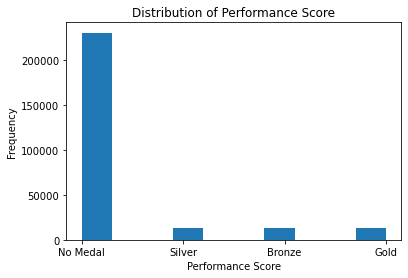

In [44]:
import matplotlib.pyplot as plt

# Histogram of the target variable 'Performance Score'
plt.hist(merged_df['Performance Score'], bins=10)
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Score')
plt.show()

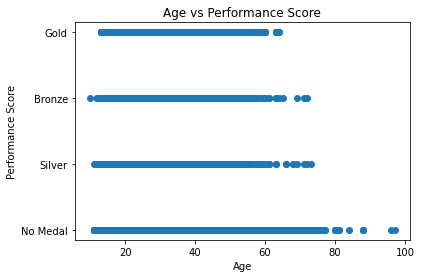

In [46]:
# Scatter plot of 'Age' vs 'Performance Score'
plt.scatter(merged_df['Age'], merged_df['Performance Score'])
plt.xlabel('Age')
plt.ylabel('Performance Score')
plt.title('Age vs Performance Score')
plt.show()

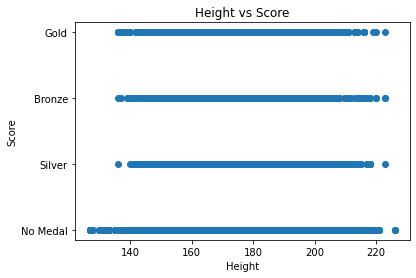

In [47]:
# Scatter plot of 'Height' vs 'Performance Score'
plt.scatter(merged_df['Height'], merged_df['Performance Score'])
plt.xlabel('Height')
plt.ylabel('Score')
plt.title('Height vs Score')
plt.show()

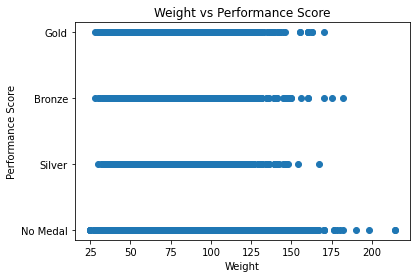

In [48]:
# Scatter plot of 'Weight' vs 'Performance Score'
plt.scatter(merged_df['Weight'], merged_df['Performance Score'])
plt.xlabel('Weight')
plt.ylabel('Performance Score')
plt.title('Weight vs Performance Score')
plt.show()

<a id="four"></a>
# 4. Feature Engineering
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---
